In [1]:
import os

import torch 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from torch.optim import Adam
from torchvision import transforms
from torch.nn import CrossEntropyLoss
from torchvision import transforms, utils
from torchvision.models import resnet50
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, DataLoader

from model.models import Net 
from model.model_util import train, test
from utils.datagen import MURADataSet
from utils.mura_utils import get_class_weights

***Explore .csv train file***

In [2]:
root_dir = './data/'
frame_path = './data/train_for_test.csv'

In [3]:
train_frame = pd.read_csv(frame_path)
train_frame.head()

,path,label,study_type,patient
0,./data/train/normal_ELBOW_patient11_study1_ima...,1,1,patient11
1,./data/train/abnormal_ELBOW_patient16_study1_i...,0,1,patient16


***Load data***

In [4]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


train_transforms = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
])

In [5]:
mura_dataset = MURADataSet(csv_file=frame_path, root_dir=root_dir, transform=train_transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


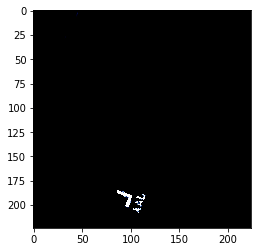

In [6]:
study_image = mura_dataset[0][0]
plt.imshow(np.transpose(study_image))
plt.show()

In [7]:
train_dataloader = DataLoader(mura_dataset, batch_size=1, shuffle=True)

In [8]:
labels = np.array(mura_dataset.path_frame.label)
print(labels)

weight_dict = get_class_weights(labels)
class_weights = list(weight_dict.values())
print("Class weights dictionary: {}".format(weight_dict))
print("Weights: {}".format(class_weights))

[1 0]
Class weights dictionary: {0: 0.5, 1: 0.5}
Weights: [0.5, 0.5]


***Define model***

In [9]:
# BASE MODEL PARAMETERS
CHANNELS = 3
NUM_CLASSES = 2
PRETRAINED = True
MODEL_NAME = 'resnet'

In [10]:
net = Net(base_model=resnet50, name=MODEL_NAME, input_channels=CHANNELS, pretrained=PRETRAINED, num_classes=NUM_CLASSES)

***Define optimization process***

In [11]:
loss = CrossEntropyLoss(weight=torch.Tensor(class_weights))
optimizer = Adam(params=net.parameters())

***Train***

In [13]:
train(model=net, num_epoch=100, train_dataloader=train_dataloader, 
      eval_dataloader=train_dataloader, optimizer=optimizer, criterion=loss)

EPOCH-----0
Current loss is -------- 1.3198162317276

[1, 1]
 Train loss: 0.0032995405793190004

Current loss is -------- 1.349901556968689


/home/mak7/PycharmProjects/MURA/mur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/mak7/PycharmProjects/MURA/mur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)



METRICA BY IMAGE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0




METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0



EPOCH-----1
Current loss is -------- 0.8139429688453674

[2, 1]
 Train loss: 0.008709151893854142

Current loss is -------- 16.306488037109375

METR

/home/mak7/PycharmProjects/MURA/mur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mak7/PycharmProjects/MURA/mur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



METRICA BY IMAGE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0




METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0



EPOCH-----5
Current loss is -------- 0.36330586671829224

[6, 1]
 Train loss: 0.1327877976000309

Current loss is -------- 1.712850570678711

METRIC


METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0



EPOCH-----13
Current loss is -------- 0.7321102619171143

[14, 1]
 Train loss: 0.16544101521372795

Current loss is -------- 0.6984282732009888

METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0




MET

Current loss is -------- 0.7494829297065735

[22, 1]
 Train loss: 0.19426360890269279

Current loss is -------- 0.6665598154067993

METRICA BY IMAGE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0




METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0



EPOCH-----22
Curr


METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0



EPOCH-----30
Current loss is -------- 0.6729564070701599

[31, 1]
 Train loss: 0.22577771082520484

Current loss is -------- 0.7261064052581787

METRICA BY IMAGE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0




MET

Current loss is -------- 0.6390761733055115

[39, 1]
 Train loss: 0.2537509573996067

Current loss is -------- 0.7598485350608826

METRICA BY IMAGE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0




METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0



EPOCH-----39
Curre


METRICA BY IMAGE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0



EPOCH-----47
Current loss is -------- 0.6565669178962708

[48, 1]
 Train loss: 0.2853408482670784

Current loss is -------- 0.7406632304191589

METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0




METR

Current loss is -------- 0.6587823629379272

[56, 1]
 Train loss: 0.31330320581793786

Current loss is -------- 0.7407659292221069

METRICA BY IMAGE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0




METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 1.0
PRECISION SCORE---------- 1.0
RECALL SCORE------------- 1.0



EPOCH-----56
Curr


METRICA BY IMAGE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 1.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0



EPOCH-----64
Current loss is -------- 0.7106035351753235

[65, 1]
 Train loss: 0.34488350480794905

Current loss is -------- 0.6890482306480408

METRICA BY IMAGE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY PATIENT
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0


METRICA BY STUDY TYPE
ACURACCY SCORE----------- 0.0
F1 SCORE----------------- 0.0
PRECISION SCORE---------- 0.0
RECALL SCORE------------- 0.0




MET

KeyboardInterrupt: 